# Regression Imputation

To do **regression imputation**, we need these pieces 
- <font color='blue'>**X_train**</font>
- <font color='blue'>**X_test**</font>
- <font color='blue'>**y_train**</font>
- <font color='blue'>**y_test**</font>

We can use `train_test_split()`: **Split** arrays or matrices into <font color='red'>**random**</font> **train** and **test** subsets   

```Python
sklearn.cross_validation.train_test_split(*arrays, **options)
```
1. Wraps input validation and next `(iter(ShuffleSplit(n_samples)))`
2. Splitting data in a **oneline**.


* **Arguments**:  
`*arrays` : sequence of arrays or `scipy.sparse` matrices **with same shape**.  
`test_size` : float, int, or `None` (default is `None`).  
`train_size` : float, int, or `None` (default is `None`).  
`random_state` : int or <font color='blue'>RandomState</font>(Pseudo-random number generator state for random sampling).

In [1]:
import pandas as pd
# linear model for linear regression
from sklearn.linear_model import LinearRegression
# using built-in dataset
from sklearn.datasets import load_boston
# For train and test subsets
from sklearn.cross_validation import train_test_split
# magic function
%matplotlib inline

/Users/trevortse/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


First, let's have a look at the dataset from the sklearn library about house prices

In [2]:
boston = load_boston()
#print(boston.DESCR)

## 0. Audition
Since the built-in dataset doesn't contains any `NaN`, we have two files in this section: 
1. `boston_df.p` have no missing value at all.
2. `boston_dropna_df.p` have been introduced some missing data.

**Let's see what affect can missing value do to the data**

In [3]:
# load the pickle file
boston_df = pd.read_pickle('boston_df.p')

In [4]:
boston_df.iloc[:,:-1].head(1) # without 'y'

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98


In [5]:
boston_df.iloc[:,-1:].head(1) # only 'y'

,y
0,24.0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(boston_df.iloc[:,:-1],
                                                    boston_df.iloc[:,-1:], 
                                                    random_state = 1)

In [7]:
map(pd.np.shape, [X_train, X_test, y_train, y_test])

In [8]:
[X_train.shape, y_train.shape, X_test.shape, y_test.shape]

[(379, 13), (379, 1), (127, 13), (127, 1)]

## 1. Preprocessing data for fitting model

**load** the *other* pickle file into a variable called `boston_dropna_df`

In [9]:
boston_dropna_df = pd.read_pickle('boston_dropna_df.p')
boston_dropna_df.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE        95
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
y           0
dtype: int64

95 missing value in `AGE`.  
let's make a copy of this data because we will use it to impute values.  

In [10]:
boston_impute_df = boston_dropna_df.copy()
boston_impute_df['AGE'].isnull().sum() #with all row and NaNs

95

<font color='red'>**Cautious**</font>:  
Without using `copy()`, for example: 
```Python
boston_impute_df = boston_dropna_df
```
It just simply initialise a new name `boston_impute_df` refering to the `boston_dropna_df`, in other words, both refer to the identical data in the memory

**Checking**: How many `NaN`s in `boston_dropna_df['AGE']`?

<font color='red'>**Drop all rows**</font> with `NaN`s in `boston_dropna_df`: No missing value is allowed for fitting dataset

In [11]:
boston_dropna_df.dropna(subset=['AGE'],axis=0,inplace=True)
boston_dropna_df['AGE'].isnull().sum()#all row contains NaN have been dropped.

0

## 2. Compare models

Here we have 2 datasets:
1. `bonston_df`: full data 
2. `boston_dropna_df`: 95 row have been removed by `dropna()`
3. `boston_impute_df`: for imputation, contains 95 row have missing value, 
First we train the linear model with `boston_dropna_df`

### Some useful information from documentations:
```Python
sklearn.linear_model.LinearRegression
```
It supports **5 methods**:
1. `model.fit(X, y, sample_weight=None)`: Fit linear model, `X`:Training data, `y`: Target value
2. `model.get_params(deep=True)`: Get parameters for this estimator
3. `model.predict(X)`: Predict using the linear model
4. `model.score(X, y, sample_weight=None)`: Return the coefficient of determination $R^2$ of the prediction.
5. `model.set_params(**params)`: Set parameters of this estimator

### 2.1  Prepare dataset for modelling

The target value `y`, now is the `AGE` column of `boston_dropna_df`, so we need a fitting dataset for the linear model.
<font color='red'>**Note**</font>:  
Dataset **with missing values** <font color='red'>**cannot**</font> be used for fitting

In [12]:
#linear mode fitting dataset: drop 'y' column
lm_fitting_df = boston_dropna_df.drop('y',axis=1)
lm_fitting_df.head() #have a look at the fitting dataset.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5.0,311.0,15.2,392.52,20.45


Then, we create model for regression imputation.

In [13]:
lm_for_impute = LinearRegression() #initialise a linaer model

Now we use fitting dataset to fit our model:
```Python
model.fit(data,labels)
```
\>>>>>

`lm_fitting_df[[x for x in lm_fitting_df.columns if x != 'AGE']] # Except 'AGE'`
`lm_fitting_df['AGE'] # Only 'AGE'`
```python
lm_for_impute.fit(lm_fitting_df[[x for x in lm_fitting_df.columns if x != 'AGE']],
                  lm_fitting_df['AGE'])
```

In [14]:
# Fitting model for predicting 'AGE'
lm_for_impute.fit(lm_fitting_df[[x for x in lm_fitting_df.columns if x != 'AGE']],
                  lm_fitting_df['AGE']) #Target value is AGE!

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### 2.2 Predict the missing values by the model

Previously we have fit our model, now it is time to do some prediction:

In [15]:
# predict
predict_value = lm_for_impute.predict(boston_impute_df.drop(['AGE','y'],axis=1))

In [16]:
# replace all cell in AGE with NaN value:
boston_impute_df['AGE'][boston_impute_df['AGE'].isnull()] = predict_value

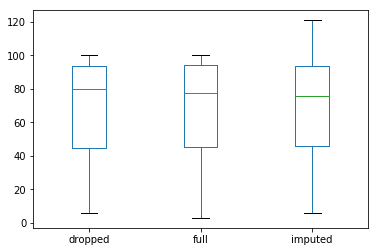

In [17]:
#Visualise it
df = pd.DataFrame({'full': boston_df['AGE'], # the full data
                   'imputed': boston_impute_df['AGE'], # Regression imputation
                   'dropped': boston_dropna_df['AGE']}) # drop all row contains NaNs
df.plot(kind='box')

As we can see, we use partial dataset to train our model.

### 2.3 Using $R^2$ score

## About $R^2$ value
The coefficient $R^2$ is defined as $(1 - u/v)$,  
> $u$ is **the residual sum of squares** `((y_true - y_pred) ** 2).sum()`  
> $v$ is **the total sum of squares** `((y_true - y_true.mean()) ** 2).sum()`

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a $R^2$ score of 0.0.

Regression formula:
$$y_i = \beta_0 + \beta_1 X_i + \epsilon_i$$


### 2.3.1 Model fit with full data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(boston_df.iloc[:,:-1],
                                                    boston_df.iloc[:,-1:],
                                                    random_state=111)
lm_full = LinearRegression()
lm_full.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### 2.3.2 Model fit with dropped data

In [19]:
X_train, X_test, y_train, y_test = train_test_split(boston_dropna_df.iloc[:,:-1],
                                                    boston_dropna_df.iloc[:,-1:],
                                                    random_state=111)
lm_dropped = LinearRegression()
lm_dropped.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### 2.3.3 Model fit with imputed data

In [20]:
X_train, X_test, y_train, y_test = train_test_split(boston_impute_df.iloc[:,:-1],
                                                    boston_impute_df.iloc[:,-1:],
                                                    random_state=111)
lm_impute = LinearRegression()
lm_impute.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### 2.3.4 Compare 3 different model $R^2$ score

In [21]:
print('r-squared for full = ', lm_full.score(X_test,y_test))
print ('r-squared for dropped = ',lm_dropped.score(X_test,y_test))
print ('r-squared for imputed = ',lm_impute.score(X_test,y_test))

r-squared for full =  0.7508731927575132
r-squared for dropped =  0.7360203060192421
r-squared for imputed =  0.7337099982198017


from [adventures-in-statistics](http://blog.minitab.com/blog/adventures-in-statistics/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit)

What Is R-squared?

R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

The definition of R-squared is fairly straight-forward; it is the percentage of the response variable variation that is explained by a linear model. Or:

R-squared = Explained variation / Total variation

R-squared is always between 0 and 100%:

0% indicates that the model explains none of the variability of the response data around its mean.  
100% indicates that the model explains all the variability of the response data around its mean.